In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
from adjustText import adjust_text

In [2]:
from nba_api.stats.endpoints.leaguedashteamstats import LeagueDashTeamStats

In [13]:
team_stats_starters_before = LeagueDashTeamStats(starter_bench_nullable="Starters", date_to_nullable="12/25/2019", per_mode_detailed='PerGame')

In [14]:
team_stats_bench_before = LeagueDashTeamStats(starter_bench_nullable= "Bench", date_to_nullable="12/25/2019", per_mode_detailed='PerGame')

In [15]:
team_stats_starters_after = LeagueDashTeamStats(starter_bench_nullable="Starters", date_from_nullable="12/25/2019", per_mode_detailed='PerGame')

In [16]:

team_stats_bench_after = LeagueDashTeamStats(starter_bench_nullable= "Bench", date_from_nullable="12/25/2019", per_mode_detailed='PerGame')

In [17]:
starters_before_df = team_stats_starters_before.get_data_frames()[0]
bench_before_df = team_stats_bench_before.get_data_frames()[0]

In [18]:
starters_after_df = team_stats_starters_after.get_data_frames()[0]
bench_after_df = team_stats_bench_after.get_data_frames()[0]

In [19]:
plt.style.use('fivethirtyeight')

In [21]:
starters_before_df.head()

,TEAM_ID,TEAM_NAME,GP,W,L,W_PCT,MIN,FGM,FGA,FG_PCT,...,TOV_RANK,STL_RANK,BLK_RANK,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,CFID,CFPARAMS
0,1610612737,Atlanta Hawks,31,6,25,0.194,28.5,26.6,59.4,0.448,...,19,9,22,29,17,12,15,28,10,Atlanta Hawks
1,1610612738,Boston Celtics,28,21,7,0.750,30.4,30.4,65.8,0.462,...,7,13,11,27,14,9,3,3,10,Boston Celtics
2,1610612751,Brooklyn Nets,29,16,13,0.552,31.0,29.3,64.3,0.456,...,18,26,15,19,25,15,5,14,10,Brooklyn Nets
3,1610612766,Charlotte Hornets,33,13,20,0.394,29.8,25.1,57.9,0.433,...,20,27,23,13,8,25,23,29,10,Charlotte Hornets
4,1610612741,Chicago Bulls,32,12,20,0.375,29.4,24.3,54.1,0.449,...,22,3,24,25,20,13,22,17,10,Chicago Bulls


In [22]:
merged = pd.merge(left=starters_before_df, right=bench_before_df, on='TEAM_ID', suffixes=('_starters', '_bench'))

28

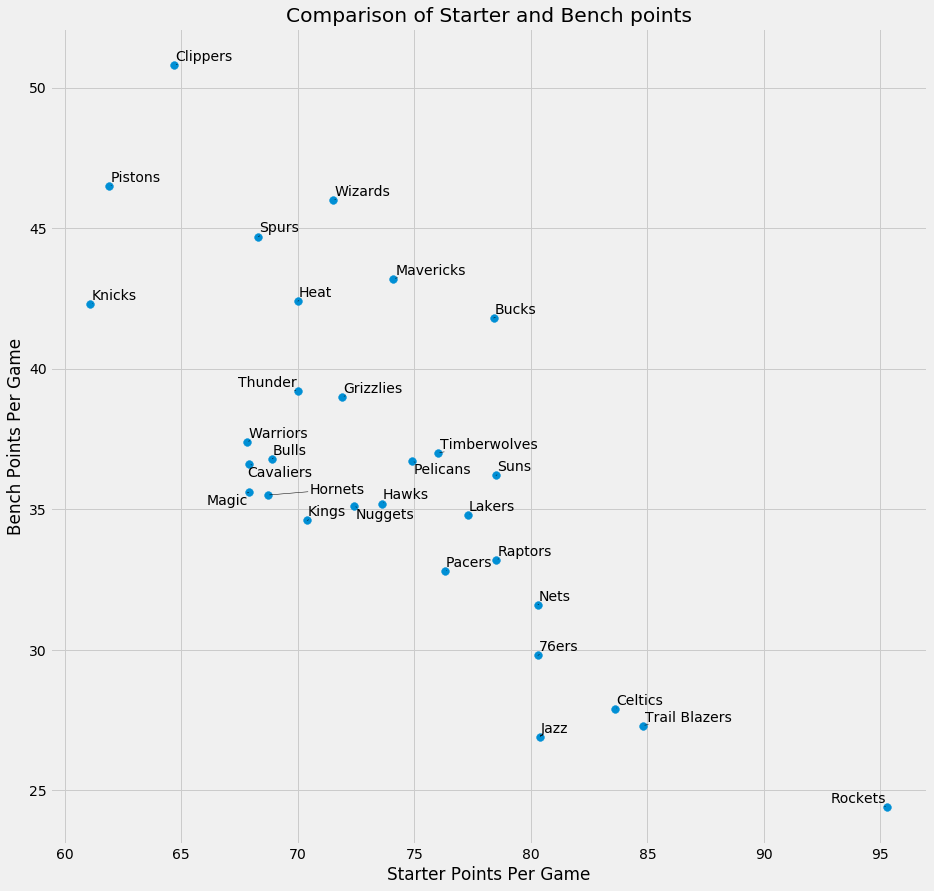

In [35]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(x=merged.PTS_starters, y=merged.PTS_bench, s=60)
ax.set_ylabel("Bench Points Per Game")
ax.set_xlabel("Starter Points Per Game")

ax.set_title("Comparison of Starter and Bench points")

texts = []
for index in range(len(merged)):
    item = merged.iloc[index]
    team_name = item.TEAM_NAME_starters.split(" ")[-1]
    if team_name == 'Blazers':
        team_name = "Trail Blazers"
    texts.append(plt.text(x=item.PTS_starters, y=item.PTS_bench, s=team_name))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'),)

In [36]:
merged_after = pd.merge(left=starters_after_df, right=bench_after_df, on='TEAM_ID', suffixes=('_starters', '_bench'))

5

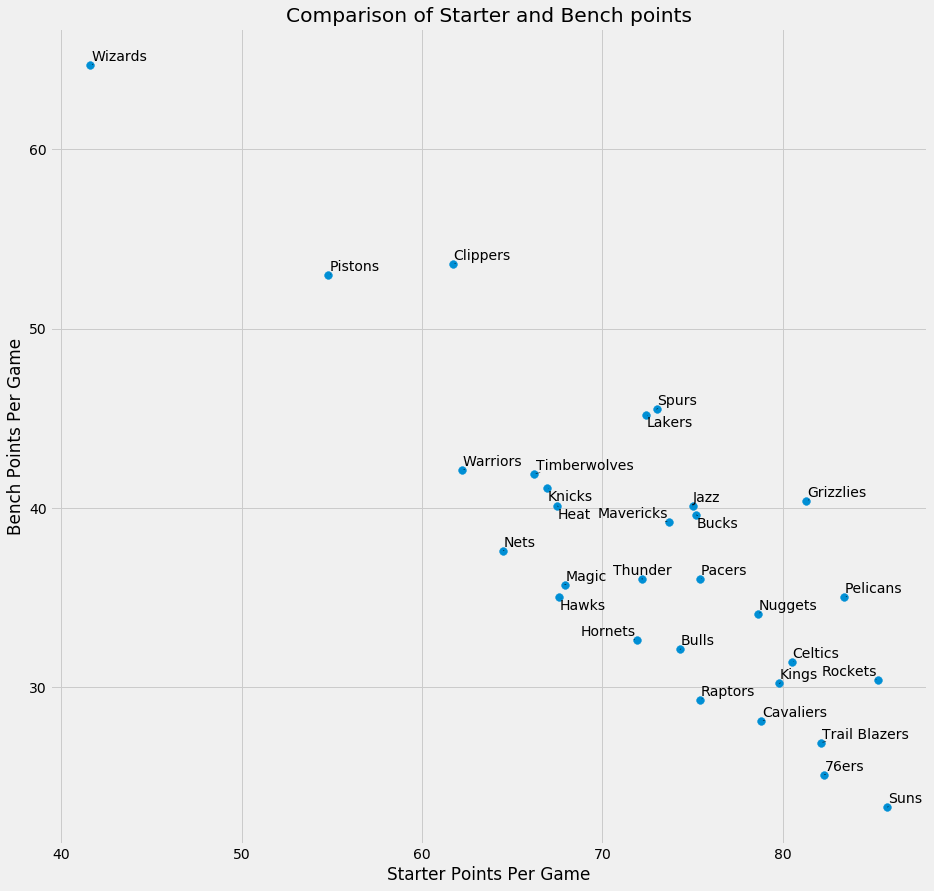

In [37]:
fig, ax = plt.subplots(figsize=(14, 14))

ax.scatter(x=merged_after.PTS_starters, y=merged_after.PTS_bench, s=60)
ax.set_ylabel("Bench Points Per Game")
ax.set_xlabel("Starter Points Per Game")

ax.set_title("Comparison of Starter and Bench points")

texts = []
for index in range(len(merged_after)):
    item = merged_after.iloc[index]
    team_name = item.TEAM_NAME_starters.split(" ")[-1]
    if team_name == 'Blazers':
        team_name = "Trail Blazers"
    texts.append(plt.text(x=item.PTS_starters, y=item.PTS_bench, s=team_name))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='k'),)

In [40]:
sorted_values = merged.sort_values(by='PTS_RANK_bench')

In [41]:
sorted_after = merged_after.sort_values(by='PTS_RANK_bench')

In [57]:
before_after_merged = pd.merge(left=bench_before_df, right=bench_after_df, on='TEAM_ID', suffixes=('_before', '_after'))

In [179]:
before_after_merged.loc[:, 'DIFF'] = before_after_merged.PTS_RANK_after - before_after_merged.PTS_RANK_before

In [183]:
sorted_val = before_after_merged.sort_values(by='DIFF', ascending=False)

In [184]:
sorted_val.iloc[0]

TEAM_ID                    1610612756
TEAM_NAME_before         Phoenix Suns
GP_before                          30
W_before                           11
L_before                           19
                             ...     
PTS_RANK_after                     30
PLUS_MINUS_RANK_after              19
CFID_after                         10
CFPARAMS_after           Phoenix Suns
DIFF                               14
Name: 23, Length: 112, dtype: object

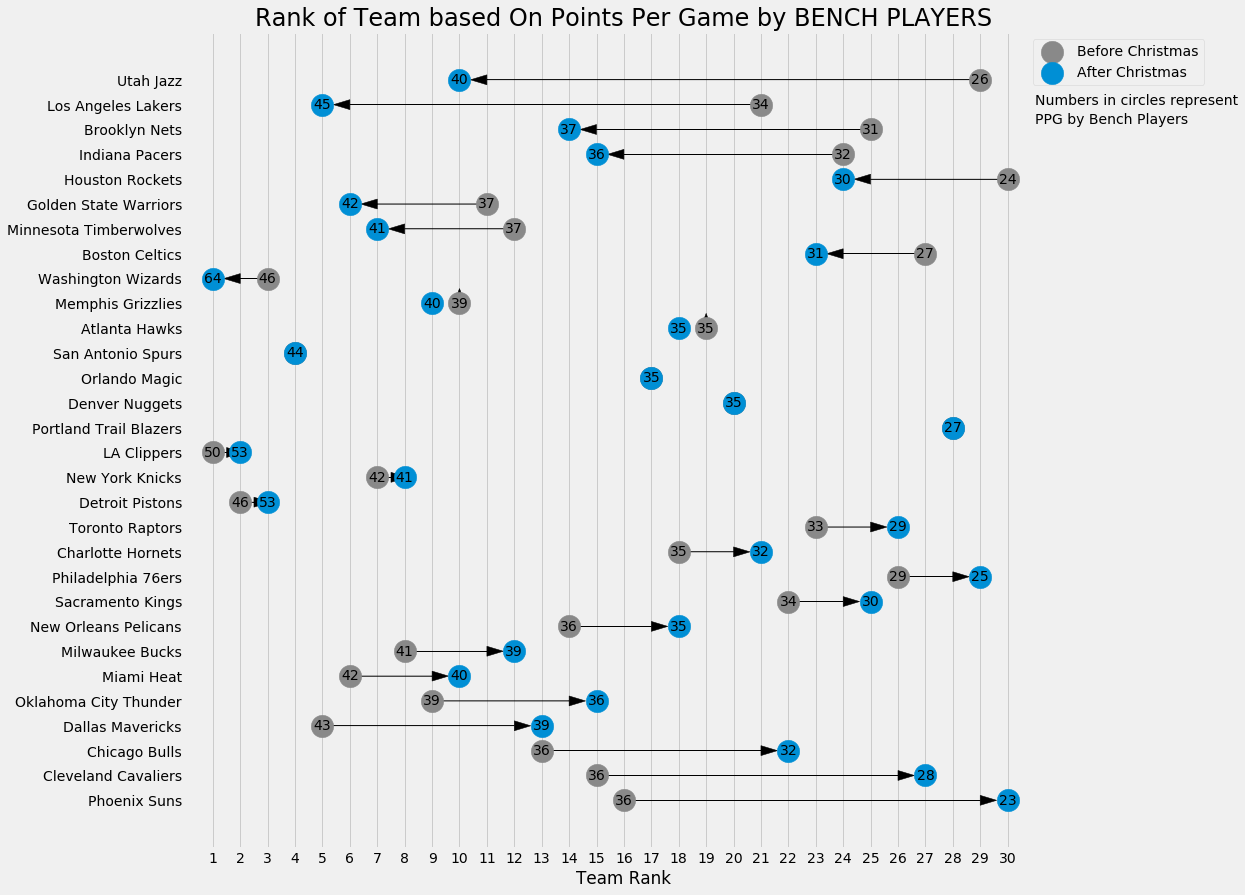

In [185]:
plt.figure(figsize=(14, 14))

for index in range(len(sorted_val)):
    item = sorted_val.iloc[index]
    y1 = index
    x1 = item.PTS_RANK_before
    dy = 0
    dx = item.PTS_RANK_after - item.PTS_RANK_before
    if item.PTS_RANK_after > item.PTS_RANK_before:
        dx = dx - 0.5 if item.DIFF == 1 else dx - 1
    elif item.PTS_RANK_after < item.PTS_RANK_before:
        dx = dx + 0.5 if item.DIFF == 1 else dx + 1
    else:
        continue
    plt.arrow(x1, y1, dx, dy, color='black', shape='full', head_width=0.4, zorder=1)
    

plt.scatter(x=sorted_val.PTS_RANK_before, y=sorted_val.TEAM_NAME_before, color='#898989', s=500, label='Before Christmas', zorder=2)
plt.scatter(x=sorted_val.PTS_RANK_after, y=sorted_val.TEAM_NAME_after, s=500, label='After Christmas', zorder=2)
for index in range(len(sorted_val)):
    item = sorted_val.iloc[index]
    
    plt.text(x=item.PTS_RANK_before, y=item.TEAM_NAME_before, s=str(item.PTS_before).split(".")[0], va='center', ha='center')
    if item.PTS_RANK_before != item.PTS_RANK_after:
        plt.text(x=item.PTS_RANK_after, y=item.TEAM_NAME_after, s=str(item.PTS_after).split(".")[0], va='center', ha='center' )

plt.grid(axis='y')

plt.title("Rank of Team based On Points Per Game by BENCH PLAYERS", fontsize=24)
plt.xlabel("Team Rank")
plt.text(x=31, y=28, s="Numbers in circles represent")
plt.text(x=31, y=27.25, s="PPG by Bench Players")
plt.xlim(0, 32)
plt.xticks(ticks=range(1, 31))
plt.legend(loc='upper right', bbox_to_anchor=(1.17, 1))

In [199]:
advanced_before = LeagueDashTeamStats(measure_type_detailed_defense='Advanced', date_to_nullable='12/25/2019')

In [200]:
advanced_after = LeagueDashTeamStats(measure_type_detailed_defense='Advanced', date_from_nullable='12/25/2019')

In [201]:
advanced_before = advanced_before.get_data_frames()[0]

In [202]:
advanced_after = advanced_after.get_data_frames()[0]

In [203]:
merged_advanced = pd.merge(left=advanced_before, right=advanced_after, on='TEAM_ID', suffixes=('_before', '_after'))

In [205]:
merged_advanced.loc[:, 'DIFF'] = merged_advanced.NET_RATING_after - merged_advanced.NET_RATING_before

In [209]:
sorted_advanced = merged_advanced.sort_values(by='DIFF', ascending=True)

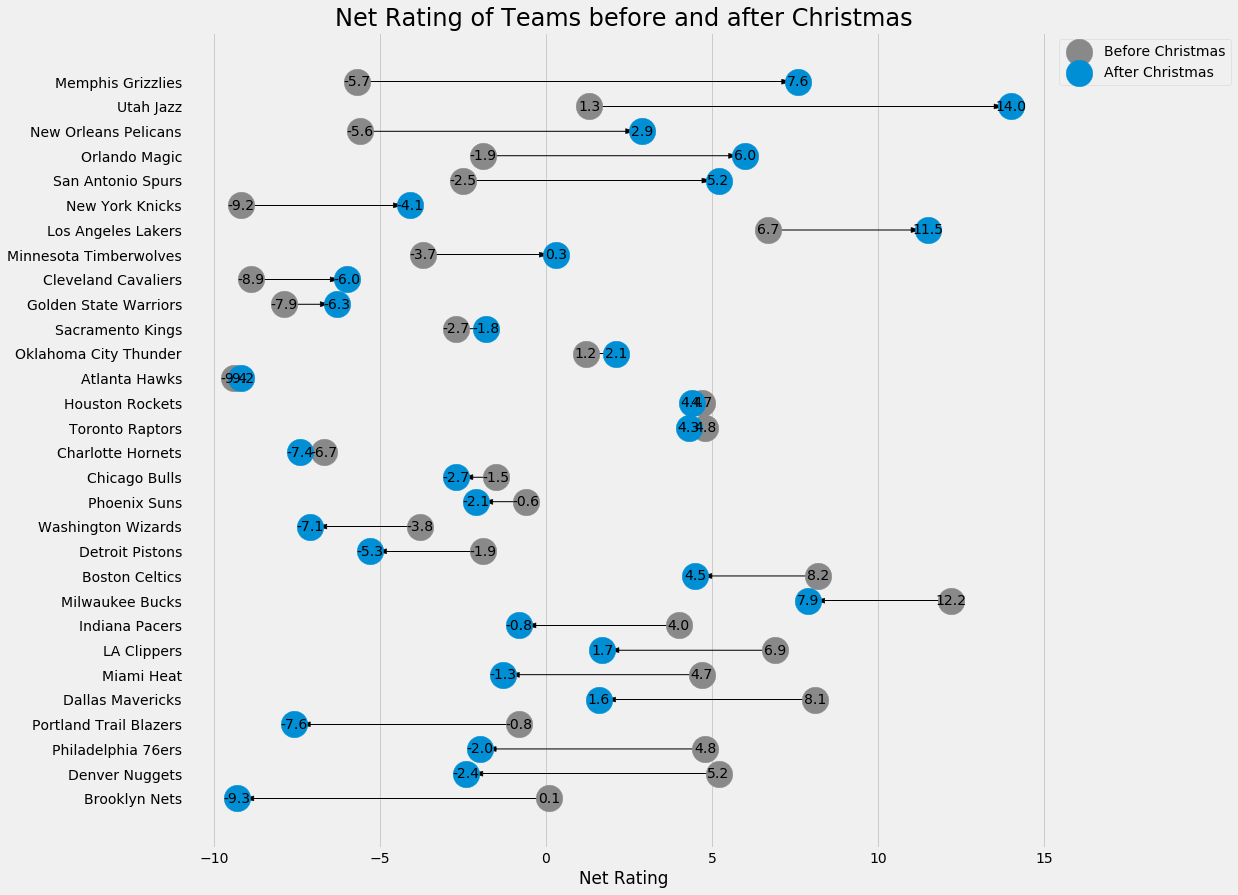

In [220]:
plt.figure(figsize=(14, 14))

for index in range(len(sorted_val)):
    item = sorted_advanced.iloc[index]
    y1 = index
    x1 = item.NET_RATING_before
    dy = 0
    dx = item.NET_RATING_after - item.NET_RATING_before
    if item.NET_RATING_after > item.NET_RATING_before:
        dx = dx - 0.1 if abs(item.DIFF) < 1 else dx - 0.5
    elif item.NET_RATING_after < item.NET_RATING_before:
        dx = dx + 0.1 if abs(item.DIFF) < 1 else dx + 0.5
    else:
        continue
    plt.arrow(x1, y1, dx, dy, color='black', shape='full', head_width=0.2, zorder=1)
    

plt.scatter(x=sorted_advanced.NET_RATING_before, y=sorted_advanced.TEAM_NAME_before, color='#898989', s=700, label='Before Christmas', zorder=2)
plt.scatter(x=sorted_advanced.NET_RATING_after, y=sorted_advanced.TEAM_NAME_after, s=700, label='After Christmas', zorder=2)
for index in range(len(sorted_val)):
    item = sorted_advanced.iloc[index]
    
    plt.text(x=item.NET_RATING_before, y=item.TEAM_NAME_before, s=str(item.NET_RATING_before), va='center', ha='center')
    plt.text(x=item.NET_RATING_after, y=item.TEAM_NAME_after, s=str(item.NET_RATING_after), va='center', ha='center' )


plt.grid(axis='y')

plt.title("Net Rating of Teams before and after Christmas", fontsize=24)
plt.xlabel("Net Rating")
#plt.text(x=31, y=28, s="Numbers in circles represent")
#plt.text(x=31, y=27.25, s="PPG by Bench Players")
#plt.xlim(0, 32)
#plt.xticks(ticks=range(1, 31))
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))